Как выполнять распознавание изображений с помощью TensorFlow.

In [14]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential



In [17]:
# importing flower dataset
import pathlib  #Здесь модуль pathlib используется для обработки имен путей к загруженному файлу изображения.

dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file(
	'flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)


228813984/228813984 [==============================] - 1s 0us/step


In [18]:
#Метод len()- подсчитываем общее количество
#Метод glob() используется для рекурсивного поиска файлов jpg в указанном каталоге.

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


3670


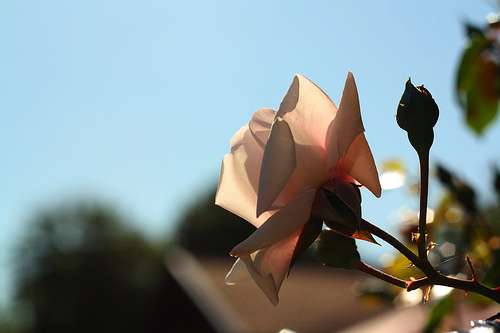

In [20]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0])) # PIL - библиотека изображений Python


In [21]:
#Создание модели
#Для работы с изображениями загрузим изображения на наш диск с помощью утилиты
#tf.keras.utils.image_dataset_from_directory. При разработке нашей модели мы используем
#обучающее разделение 80% изображений для обучения и 20% для проверки.
# Training split
train_ds = tf.keras.utils.image_dataset_from_directory(
	data_dir,
	validation_split=0.2,
	subset="training",
	seed=123,
	image_size=(180, 180),
	batch_size=32)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [22]:
#Здесь мы предоставляем тестовый набор данных для разделения в соотношении 80: 20, точно так же, как
# мы делали при обучающем разделении в приведенном выше коде.

# Testing or Validation split
val_ds = tf.keras.utils.image_dataset_from_directory(
	data_dir,
	validation_split=0.2,
	subset="validation",
	seed=123,
	image_size=(180,180),
	batch_size=32)


Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [23]:
#Мы можем проверить имена классов, вызвав атрибут class_names в обучающем наборе
#данных в алфавитном порядке в предыдущем коде.

class_names = train_ds.class_names
print(class_names)


['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


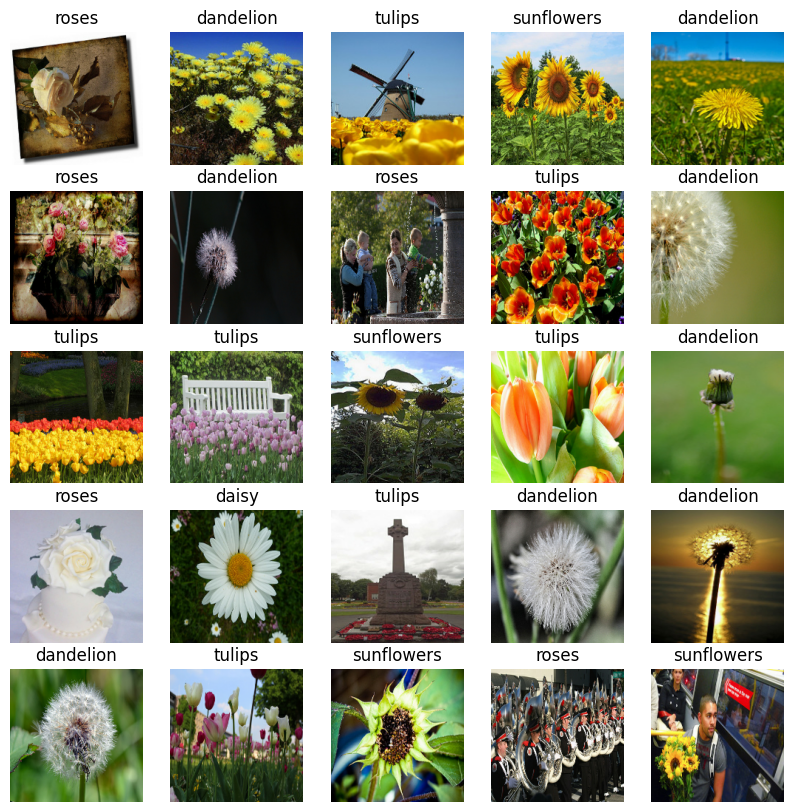

In [24]:
#Мы можем просмотреть 25 изображений из обучающего набора данных.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10)) #размер 10 на 10

for images, labels in train_ds.take(1):
	for i in range(25):
		ax = plt.subplot(5, 5, i + 1) #упорядочили 5 строк, 5 столбцов
		plt.imshow(images[i].numpy().astype("uint8"))
		plt.title(class_names[labels[i]])
		plt.axis("off")



In [25]:
#Создание модели.
# CNN (Сверточная нейронная сеть). Keras имеет множество форматов для построения моделей,
#последовательная модель является наиболее часто используемой моделью, поскольку она состоит из трех
#слоев свертки (Conv2D, MaxPooling2D и Dense) со 128 блоками поверх, активируется функцией активации ReLU (‘relu’).
#Cоздадим модель с помощью функции Sequential().
num_classes = len(class_names)

model = Sequential([
	layers.Rescaling(1./255, input_shape=(180,180, 3)),
	layers.Conv2D(16, 3, padding='same', activation='relu'),
	layers.MaxPooling2D(),
	layers.Conv2D(32, 3, padding='same', activation='relu'),
	layers.MaxPooling2D(),
	layers.Conv2D(64, 3, padding='same', activation='relu'),
	layers.MaxPooling2D(),
	layers.Flatten(),
	layers.Dense(128, activation='relu'),
	layers.Dense(num_classes)
])




In [26]:
#Компиляция модели:

#Чтобы просмотреть точность обучения и проверки для каждой эпохи обучения, передаём аргумент metrics
# методу model.compile(). Здесь мы использовали оптимизатор ‘adam’ и функцию потерь
#SparseCategoricalCrossentropy() для оценки потерь. Здесь мы использовали метод model.summary(),
#который позволяет нам просматривать все уровни сети.
model.compile(optimizer='adam',
			loss=tf.keras.losses.SparseCategoricalCrossentropy(
				from_logits=True),
			metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [28]:
#Обучение модели с помощью метода model.fit(), который позволяет машине изучать шаблоны, предоставляя
#модели обучающий и тестовый / валидационный набор данных.
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)




Epoch 1/10
92/92 [==============================] - 98s 1s/step - loss: 1.0511 - accuracy: 0.5715 - val_loss: 1.0536 - val_accuracy: 0.5722
Epoch 2/10
92/92 [==============================] - 96s 1s/step - loss: 0.8597 - accuracy: 0.6720 - val_loss: 0.9775 - val_accuracy: 0.6390
Epoch 3/10
92/92 [==============================] - 94s 1s/step - loss: 0.6680 - accuracy: 0.7606 - val_loss: 0.9832 - val_accuracy: 0.6349
Epoch 4/10
92/92 [==============================] - 94s 1s/step - loss: 0.4274 - accuracy: 0.8440 - val_loss: 1.1107 - val_accuracy: 0.6240
Epoch 5/10
92/92 [==============================] - 94s 1s/step - loss: 0.2847 - accuracy: 0.9070 - val_loss: 1.1643 - val_accuracy: 0.6662
Epoch 6/10
92/92 [==============================] - 95s 1s/step - loss: 0.1549 - accuracy: 0.9520 - val_loss: 1.3025 - val_accuracy: 0.6717
Epoch 7/10
92/92 [==============================] - 92s 1s/step - loss: 0.0933 - accuracy: 0.9751 - val_loss: 1.6117 - val_accuracy: 0.6540
Epoch 8/10
92/92 [==

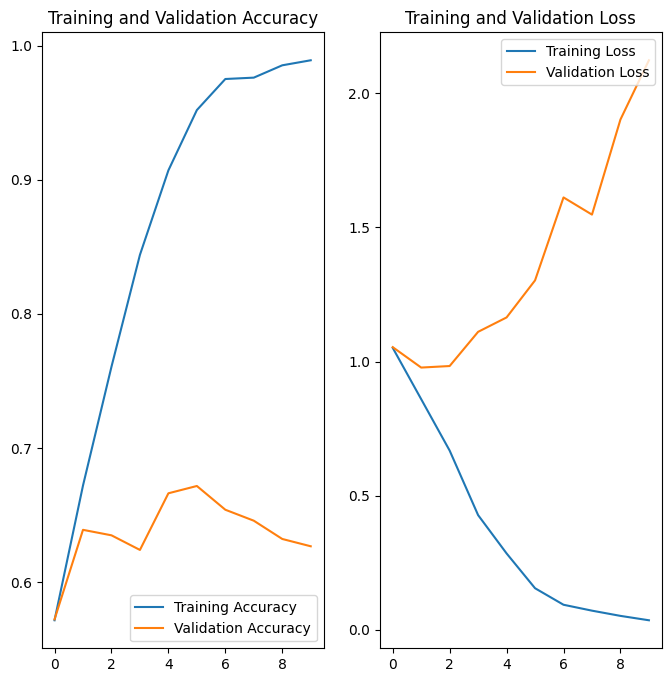

In [29]:
#Визуализация результата в обучающем наборе данных:
#Создание графиков точности и потерь в наборах обучения и проверки для учета смещения и дисперсии.
#Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#loss
loss = history.history['loss']
val_loss = history.history['val_loss']

#epochs
epochs_range = range(epochs)

#Plotting graphs
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Здесь графики наглядно демонстрируют точность обучения и валидации.
